<a href="https://colab.research.google.com/github/Yuvraj-cyborg/EDA_Titanic/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initialisation of the EDA with all libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8,5)

Use Titanic dataset from Seaborn

In [ ]:
print("\nLoading Titanic Dataset...")
df = sns.load_dataset("titanic")

print("Dataset Loaded Successfully !")
print("Shape: ",df.shape)
df.head()


Loading Titanic Dataset...
Dataset Loaded Successfully !
Shape:  (891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Basic Info and summary statistics


column names :

In [ ]:
columns = df.columns
print("Column Names: ")
for col in columns:
    print(f"- {col}")

Column Names: 
- survived
- pclass
- sex
- age
- sibsp
- parch
- fare
- embarked
- class
- who
- adult_male
- deck
- embark_town
- alive
- alone


In [ ]:
print("Dataset info :- ")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


Check number of rows and columns

In [ ]:
print("\nDataset Dimensions: ")
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")


Dataset Dimensions: 
Rows: 891
Columns: 15


Data types of all columns or features

In [ ]:
print("\nData Types:")
print(df.dtypes)


Data Types:
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object


Number of unique values in each column

In [ ]:
print("\nUnique Values: ")
print(df.nunique())


Unique Values: 
survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64


In [ ]:
print("\nvariable counts:")
print(df.count())

Missing values in each column

In [19]:
print("\nMissing values: ")
missing = df.isnull().sum()
print("Number of missing values in each column: ")
print(missing)


Missing values: 
Number of missing values in each column: 
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [16]:
missing_pct=df.isnull().mean().sort_values(ascending=False)
print((missing_pct[missing_pct>0]*100).round(2))


Percentage of missing values in each column: 
deck           0.772166
age            0.198653
embarked       0.002245
embark_town    0.002245
sex            0.000000
pclass         0.000000
survived       0.000000
fare           0.000000
parch          0.000000
sibsp          0.000000
class          0.000000
adult_male     0.000000
who            0.000000
alive          0.000000
alone          0.000000
dtype: float64


Descriptive Statistics of categorical and numerical columns

In [18]:
print("\nNumeric summary: ")
display(df.describe(include=[np.number]).T)
print("\nCategorical summary: ")
display(df.describe(include=['object','category', 'bool']).T)


Numeric summary: 


,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292



Categorical summary: 


,count,unique,top,freq
sex,891,2,male,577
embarked,889,3,S,644
class,891,3,Third,491
who,891,3,man,537
adult_male,891,2,True,537
deck,203,7,C,59
embark_town,889,3,Southampton,644
alive,891,2,no,549
alone,891,2,True,537


#**Data Analysis**

numeric and categorical columns

In [20]:
target_column='survived'
print("\nNumeric Features:")
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col!=target_column]
print(numeric_cols)
print("\nCategorical Features:")
categorical_cols = df.select_dtypes(include=['object','category', 'bool']).columns.tolist()
print(categorical_cols)
print("\nTarget Column:")
print(target_column)


Numeric Features:
['pclass', 'age', 'sibsp', 'parch', 'fare']

Categorical Features:
['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']

Target Column:
survived


#Univariate analysis

##Numerical features(Histogram)


Univariate Analysis:


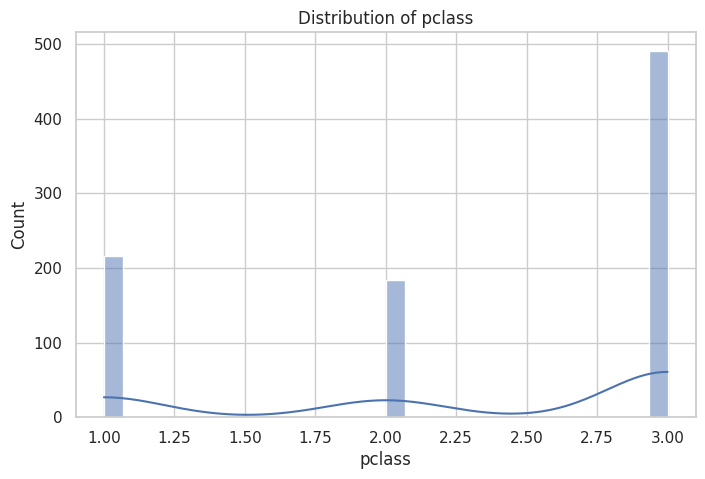

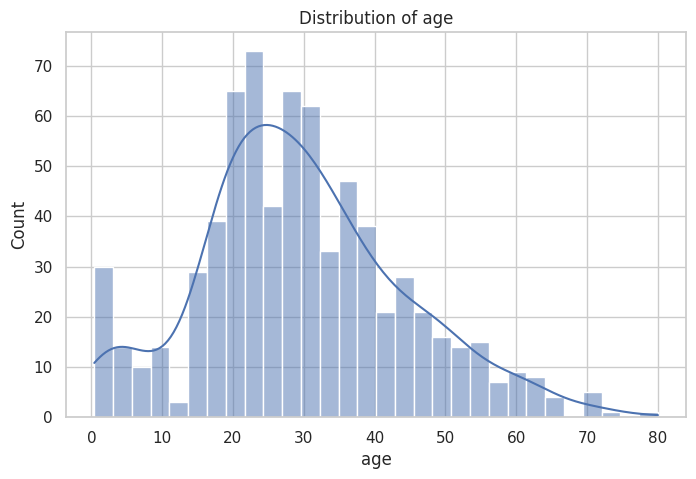

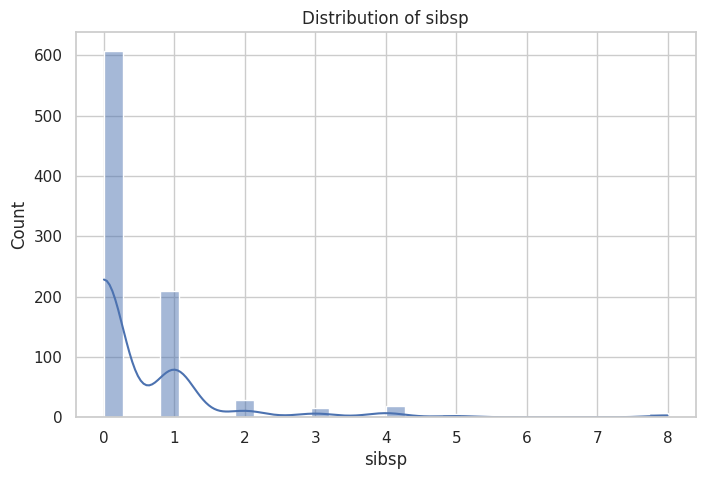

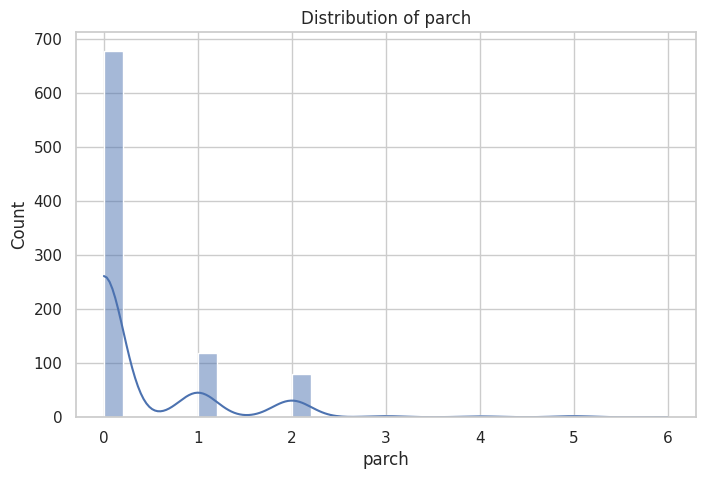

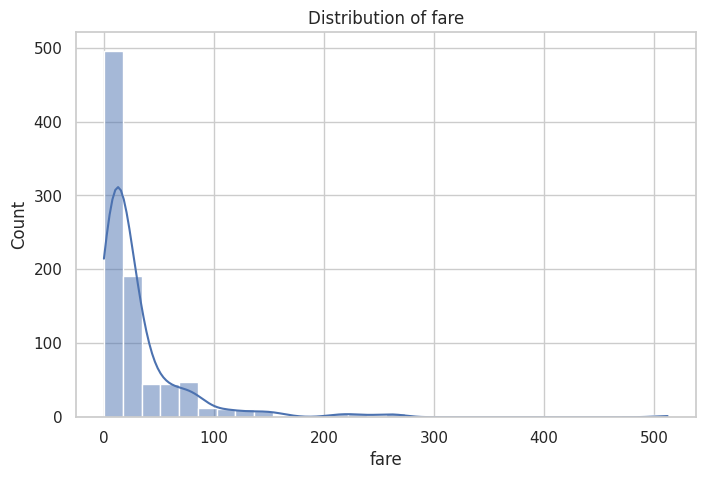

In [22]:
print("\nUnivariate Analysis:")
for col in numeric_cols:
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

##Top catrgories for categorical features (value counts)


Categorical Feature count:


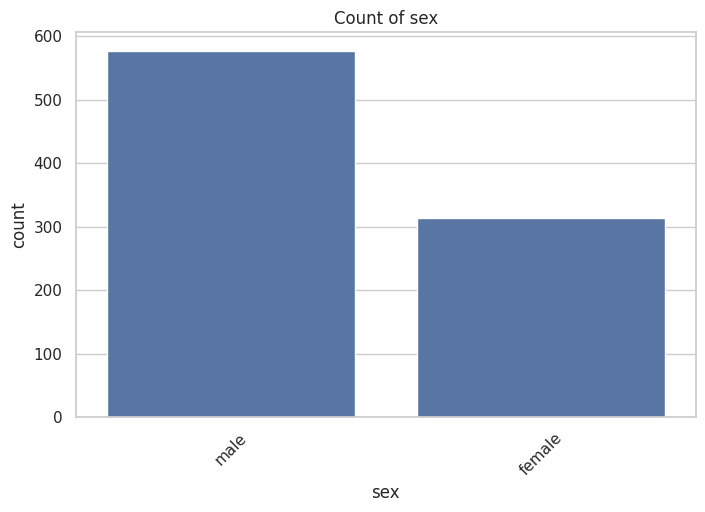

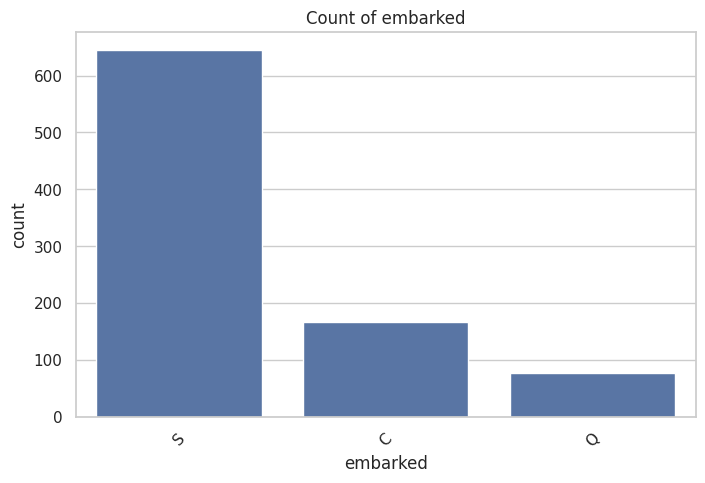

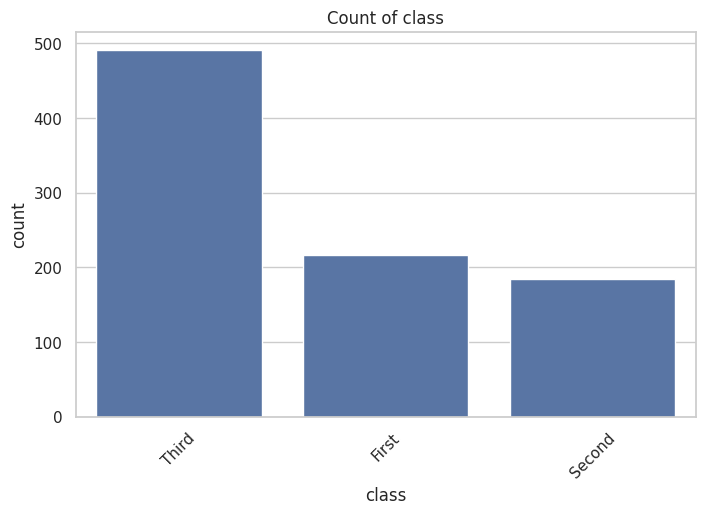

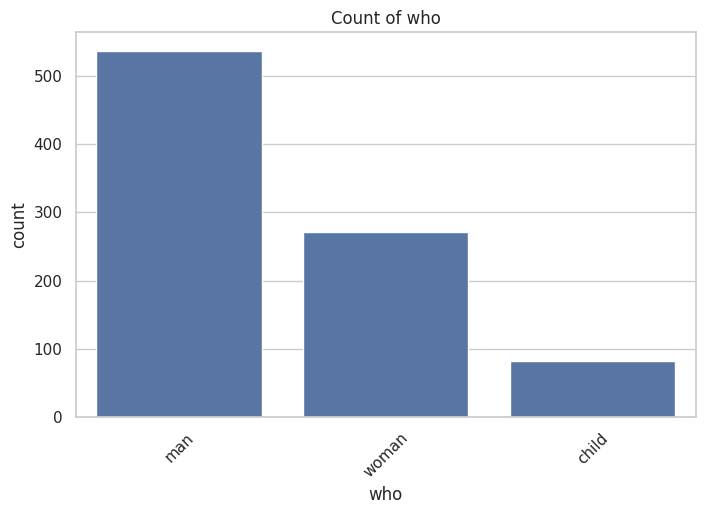

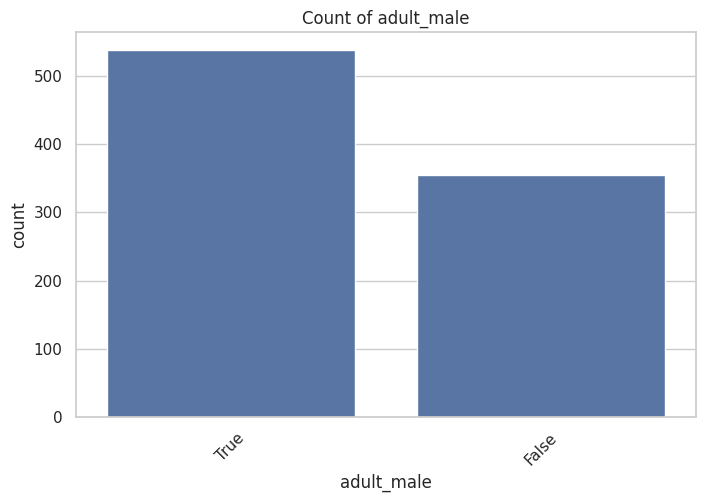

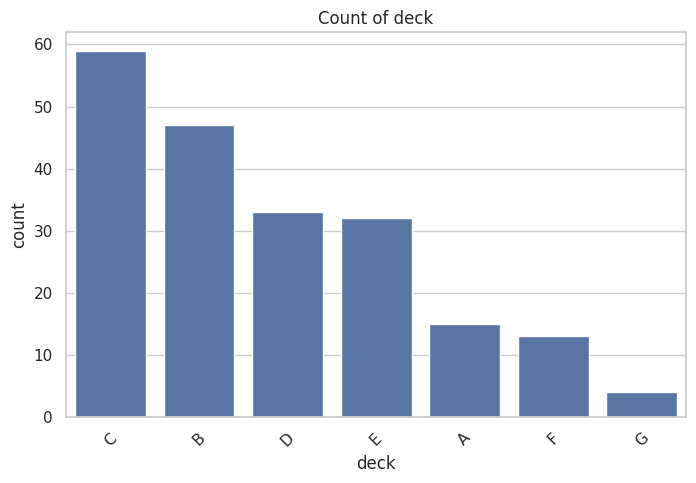

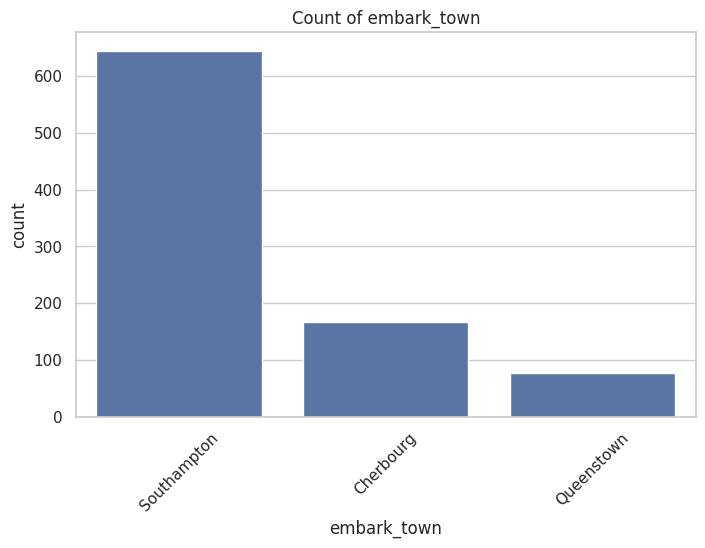

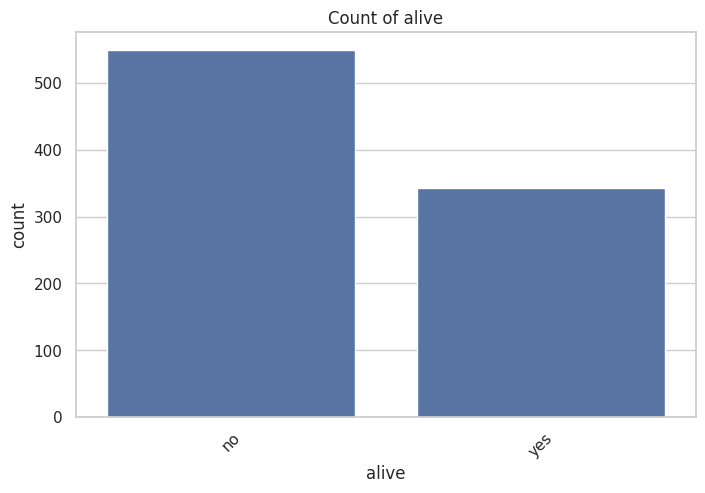

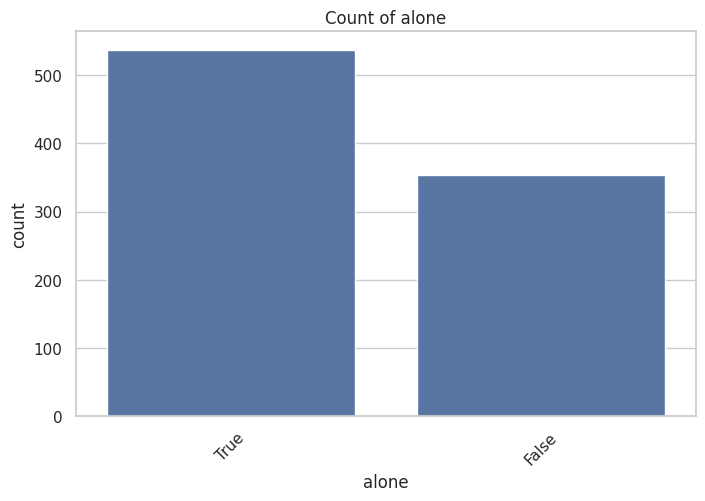

In [23]:
print("\nCategorical Feature count:")
for col in categorical_cols:
    plt.figure()
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.show()

#Bivariate analysis

###Features relate to the target

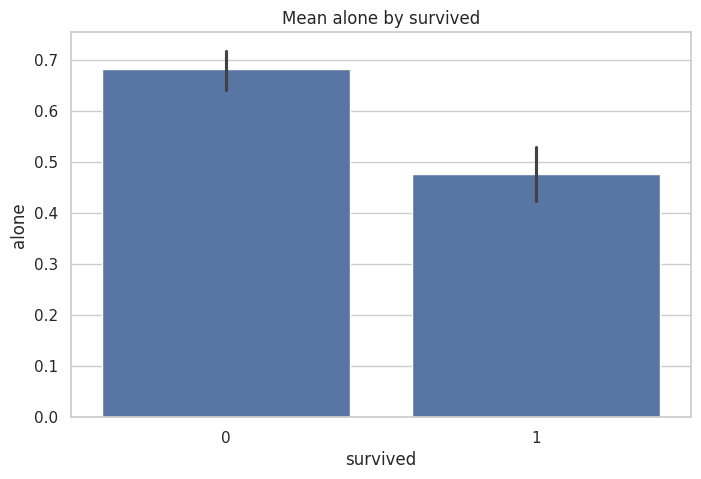

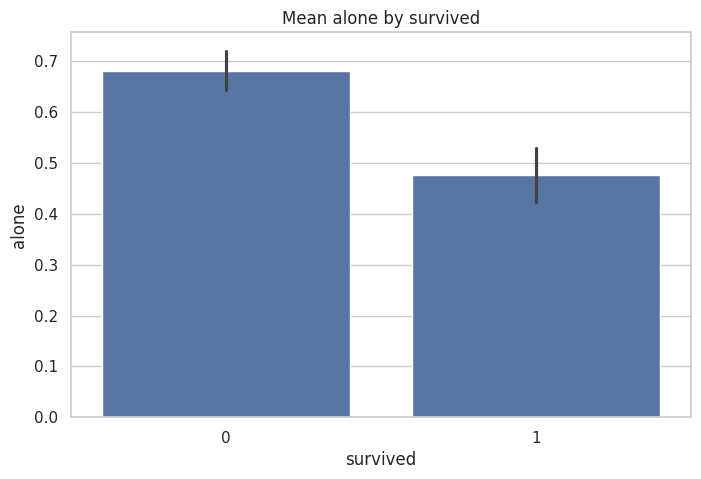

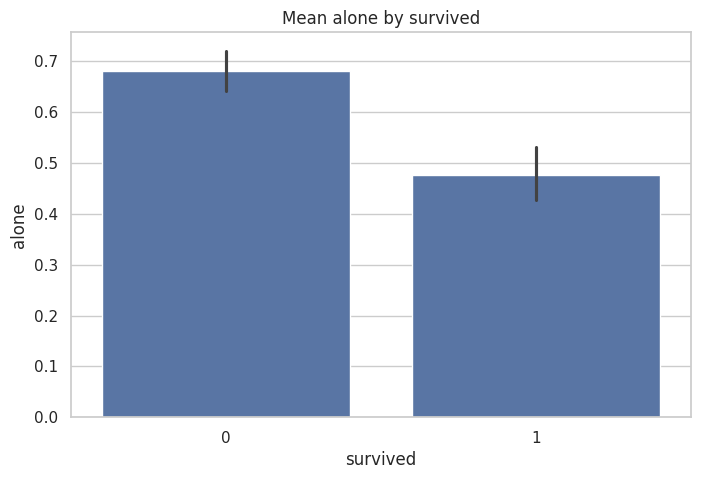

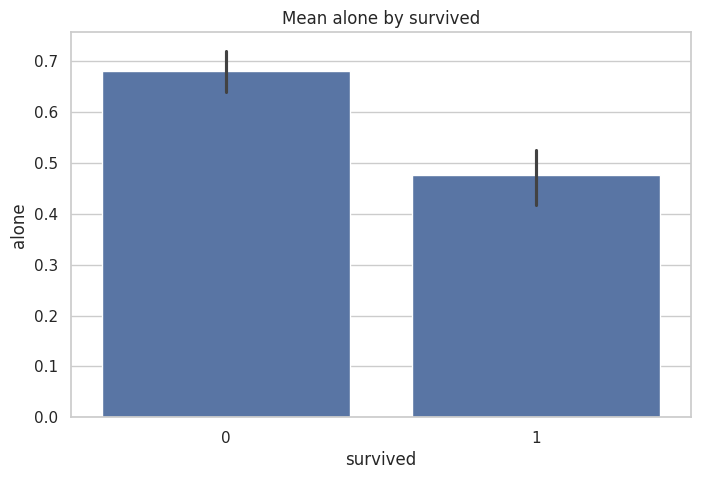

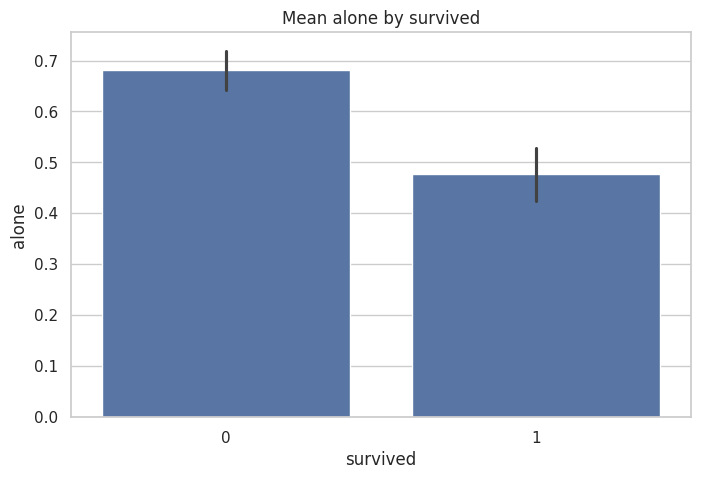

In [25]:
# Numeric vs target: barplots
for cols in numeric_cols:
    plt.figure()
    sns.barplot(data=df, x=target_column, y=col)
    plt.title(f'Mean {col} by {target_column}')
    plt.show()

# Mean parch by survived


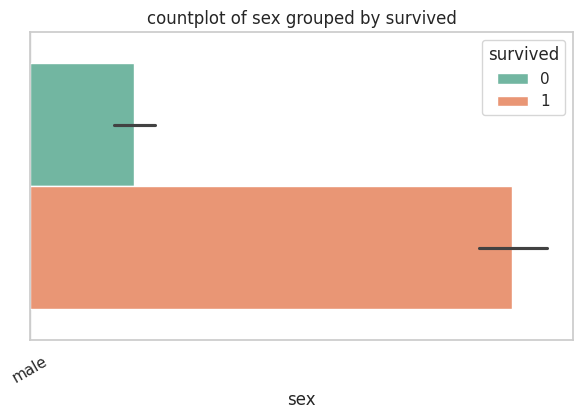

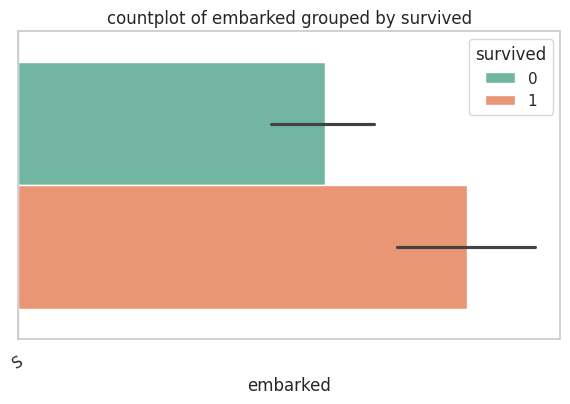

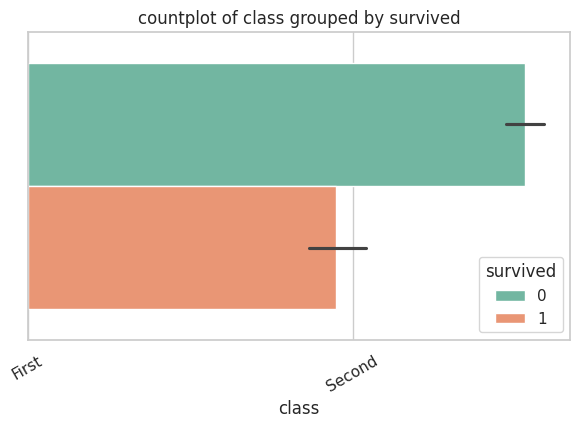

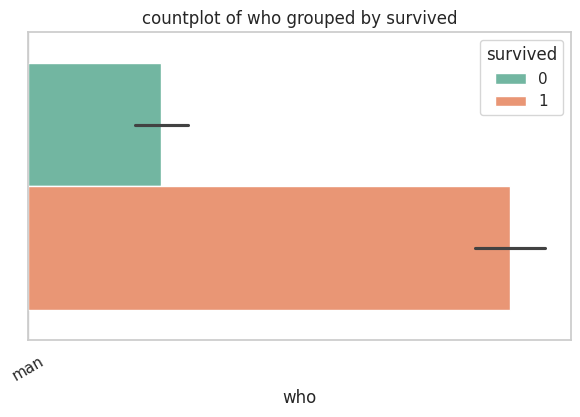

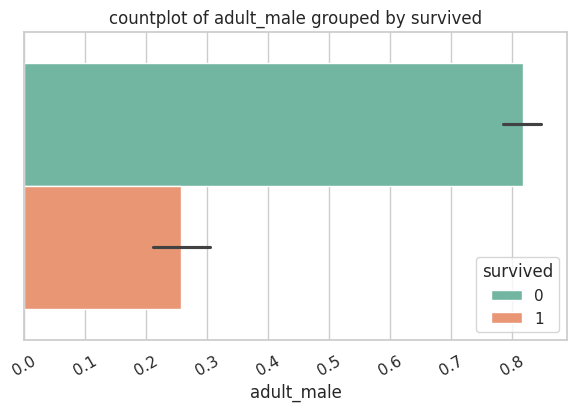

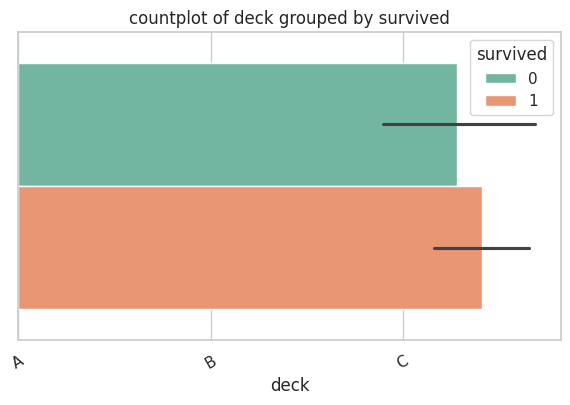

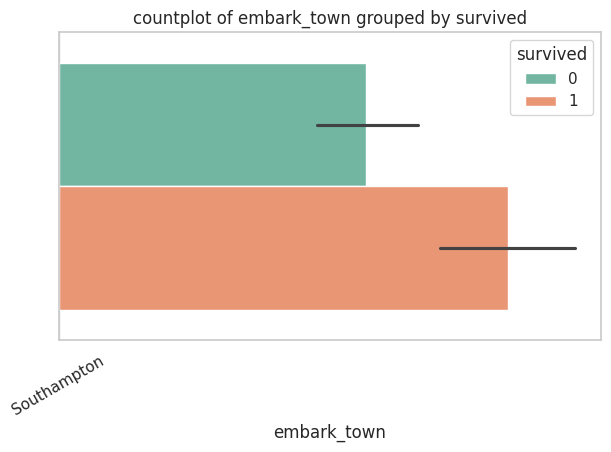

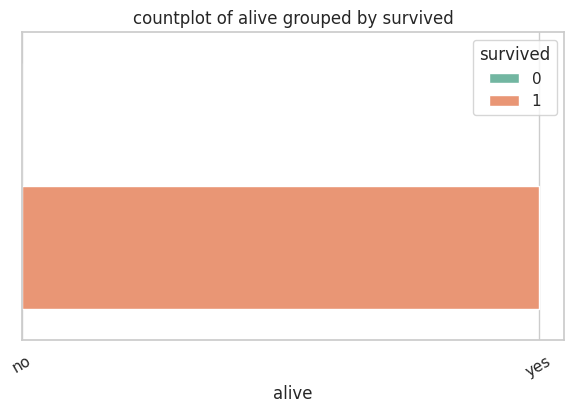

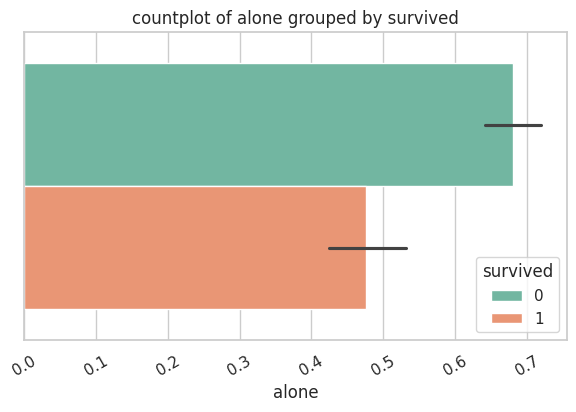

In [32]:
#categorical vs target
for col in categorical_cols:
    plt.figure(figsize=(7,4))
    sns.barplot(x=col,hue=target_column,data=df, palette="Set2")
    plt.title(f'countplot of {col} grouped by {target_column}')
    plt.xticks(rotation=30)
    plt.legend(title=target_column)
    plt.show()